In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv

from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

from tensorflow import keras

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

2024-01-02 09:13:51.307895: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 09:13:51.313897: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 09:13:51.382874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 09:13:51.382924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 09:13:51.384501: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
image_dir = 'cell_images/'
dataset = []
label   = []
size    = 64

In [3]:
parasitized_img = os.listdir(image_dir+"Parasitized/")
for i, img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv.imread(image_dir+"Parasitized/"+img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))
        image = dataset.append(np.array(image))
        
        label.append(0)

  0%|          | 0/13779 [00:00<?, ?it/s]

In [4]:
uninfected_img = os.listdir(image_dir+"Uninfected/")
for i, img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv.imread(image_dir+"Uninfected/"+img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size,size))
        
        image = dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13779 [00:00<?, ?it/s]

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
x_train,x_test,y_train,y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 42)

In [6]:
x_train[0].shape, y_train[0].shape

((64, 64, 3), (2,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        3136      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 64)        65600     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_5 (Dense)             (None, 512)              

In [21]:
history = model.fit(np.array(x_train), y_train, batch_size = 64, verbose = 1, epochs = 15, validation_split = 0.1, shuffle = False)

Epoch 1/15
311/311 [==============================] - 88s 280ms/step - loss: 11.8291 - accuracy: 0.5658 - val_loss: 0.6827 - val_accuracy: 0.5773
Epoch 2/15
311/311 [==============================] - 88s 282ms/step - loss: 0.6839 - accuracy: 0.6057 - val_loss: 0.6753 - val_accuracy: 0.6027
Epoch 3/15
311/311 [==============================] - 87s 281ms/step - loss: 0.6900 - accuracy: 0.6357 - val_loss: 0.6668 - val_accuracy: 0.6367
Epoch 4/15
311/311 [==============================] - 88s 281ms/step - loss: 0.6173 - accuracy: 0.6804 - val_loss: 0.4452 - val_accuracy: 0.8136
Epoch 5/15
311/311 [==============================] - 87s 281ms/step - loss: 0.3236 - accuracy: 0.9139 - val_loss: 0.2043 - val_accuracy: 0.9333
Epoch 6/15
311/311 [==============================] - 88s 283ms/step - loss: 0.1518 - accuracy: 0.9522 - val_loss: 0.2388 - val_accuracy: 0.9311
Epoch 7/15
311/311 [==============================] - 87s 278ms/step - loss: 0.1155 - accuracy: 0.9667 - val_loss: 0.2897 - val_a

In [22]:
losses = pd.DataFrame(model.history.history)

<Axes: >

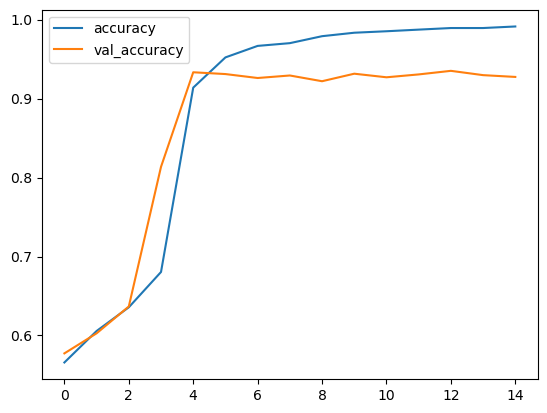

In [23]:
losses[['accuracy','val_accuracy']].plot()